# Analysis file for Ariane quantitative runs
gets data from .nc file into basic plot<br>
based on code from https://github.com/SalishSeaCast/analysis-susan/blob/master/notebooks/Ariane/FluxRobertsBankApr2015-New.ipynb

In [1]:
import cmocean.cm as cm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import scipy.interpolate as interp
from scipy.stats import binned_statistic_2d

%matplotlib inline

### get grid info

In [2]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

# Functions

In [3]:
def draw_patches(fmask, lonW, lonE, t_dist, t_depths): #draw ground part of cross section
    topo = []
    for i in range(lonW,lonE):
        for j in range(39):
            if fmask[j, i] == 0:
                rect = Rectangle((t_dist[i], t_depths[j]), t_dist[i+1]-t_dist[i], t_depths[j+1]-t_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='burlywood', edgecolors='burlywood', zorder=3)
    return(pc)

In [4]:
def saltCS(section, lonW, lonE, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = mydata.init_t[-1]
    
    lons = mydata.final_lon[(mydata.final_section==section)]
    lats = mydata.final_lat[(mydata.final_section==section)]
    
    t_lons = mymesh.glamt[0, igrid]
    m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
    t_dist = t_lons/m2lon
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lons/m2lon
    depths = depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0]
    salts = mydata.final_salt[(mydata.final_section==section)]
    
    vmax = 32
    vmin = 29

    H = binned_statistic_2d(dist, depths, salts, statistic=np.mean, bins=[np.array(t_dist[lonW-1:lonE]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[lonW-1:lonE]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.haline
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('psu', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[lonW+1], t_dist[lonE-1], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lons[lonW+1], t_lons[lonE-1], 5),2))
    ax.set_xlim((t_dist[lonW-2], t_dist[lonE]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

In [5]:
def tempCS(section, lonW, lonE, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = mydata.init_t[-1]
    
    lons = mydata.final_lon[(mydata.final_section==section)]
    lats = mydata.final_lat[(mydata.final_section==section)]
    
    t_lons = mymesh.glamt[0, igrid]
    m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
    t_dist = t_lons/m2lon
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lons/m2lon
    depths = depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0]
    temps = mydata.final_temp[(mydata.final_section==section)]
    
    vmax = 13
    vmin = 6

    H = binned_statistic_2d(dist, depths, temps, statistic=np.mean, bins=[np.array(t_dist[lonW-1:lonE]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[lonW-1:lonE]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.thermal
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('$\deg C', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[lonW+1], t_dist[lonE-1], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lons[lonW+1], t_lons[lonE-1], 5),2))
    ax.set_xlim((t_dist[lonW-2], t_dist[lonE]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

In [6]:
def siliconCS(section, lonW, lonE, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = mydata2.init_t[-1]
    
    lons = mydata2.final_lon[(mydata2.final_section==section)]
    lats = mydata2.final_lat[(mydata2.final_section==section)]
    
    t_lons = mymesh.glamt[0, igrid]
    m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
    t_dist = t_lons/m2lon
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lons/m2lon
    depths = depthf(mydata2.final_z[(mydata2.final_section==section)]-1.)[0]
    salts = mydata2.final_salt[(mydata2.final_section==section)]
    
    vmax = 45
    vmin = 15

    H = binned_statistic_2d(dist, depths, salts, statistic=np.mean, bins=[np.array(t_dist[lonW-1:lonE]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[lonW-1:lonE]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.matter
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('mmol m-3', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[lonW+1], t_dist[lonE-1], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lons[lonW+1], t_lons[lonE-1], 5),2))
    ax.set_xlim((t_dist[lonW-2], t_dist[lonE]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

In [7]:
def nitrateCS(section, lonW, lonE, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lon = mymesh.nav_lon[igrid]
    time = mydata2.init_t[-1]
    
    lons = mydata2.final_lon[(mydata2.final_section==section)]
    lats = mydata2.final_lat[(mydata2.final_section==section)]
    
    t_lons = mymesh.glamt[0, igrid]
    m2lon = ((t_lons[lonE]-t_lons[lonW])/(mymesh.e1t[0, igrid, lonW:lonE].sum()))
    t_dist = t_lons/m2lon
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lons/m2lon
    depths = depthf(mydata2.final_z[(mydata2.final_section==section)]-1.)[0]
    temps = mydata2.final_temp[(mydata2.final_section==section)]
    
    vmax = 35
    vmin = 10

    H = binned_statistic_2d(dist, depths, temps, statistic=np.mean, bins=[np.array(t_dist[lonW-1:lonE]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[lonW-1:lonE]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.rain
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('mmol m-3', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, lonW-2, lonE, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[lonW+1], t_dist[lonE-1], 5))
    ax.set_xticklabels(np.round(np.linspace(t_lons[lonW+1], t_lons[lonE-1], 5),2))
    ax.set_xlim((t_dist[lonW-2], t_dist[lonE]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

### Functions specific for Deception

In [8]:
def DsaltCS(section, latS, latN, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[igrid]
    time = mydata.init_t[-1]
    
    lats = mydata.final_lat[(mydata.final_section==section)]
    
    t_lat = mymesh.gphit[0,:,igrid]
    m2lat = ((t_lat[latN]-t_lat[latS])/(mymesh.e2t[0, latS:latN, igrid].sum()))
    t_dist = t_lat/m2lat
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lats/m2lat
    depths = depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0]
    salts = mydata.final_salt[(mydata.final_section==section)]
    
    vmax = 34
    vmin = 28

    H = binned_statistic_2d(dist, depths, salts, statistic=np.mean, bins=[np.array(t_dist[latS-1:latN+1]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[latS-1:latN+1]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.haline
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('psu', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[latS-1], t_dist[latN], 2))
    ax.set_xticklabels(np.round(np.linspace(t_lat[latS-1], t_lat[latN], 2),2))
    ax.set_xlim((t_dist[latS-2], t_dist[latN]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

In [9]:
def DtempCS(section, latS, latN, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[igrid]
    time = mydata.init_t[-1]
    
    lats = mydata.final_lat[(mydata.final_section==section)]
    
    t_lat = mymesh.gphit[0,:,igrid]
    m2lat = ((t_lat[latN]-t_lat[latS])/(mymesh.e2t[0, latS:latN, igrid].sum()))
    t_dist = t_lat/m2lat
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lats/m2lat
    depths = depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0]
    temps = mydata.final_temp[(mydata.final_section==section)]
    
    vmax = 13
    vmin = 6

    H = binned_statistic_2d(dist, depths, temps, statistic=np.mean, bins=[np.array(t_dist[latS-1:latN+1]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[latS-1:latN+1]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.thermal
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('$^{\circ}$C', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[latS-1], t_dist[latN], 2))
    ax.set_xticklabels(np.round(np.linspace(t_lat[latS-1], t_lat[latN], 2),2))
    ax.set_xlim((t_dist[latS-2], t_dist[latN]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

In [10]:
def DsiliconCS(section, latS, latN, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[igrid]
    time = mydata2.init_t[-1]
    
    lats = mydata2.final_lat[(mydata2.final_section==section)]
    
    t_lat = mymesh.gphit[0,:,igrid]
    m2lat = ((t_lat[latN]-t_lat[latS])/(mymesh.e2t[0, latS:latN, igrid].sum()))
    t_dist = t_lat/m2lat
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lats/m2lat
    depths = depthf(mydata2.final_z[(mydata2.final_section==section)]-1.)[0]
    salts = mydata2.final_salt[(mydata2.final_section==section)]
    
    vmax = 45
    vmin = 15

    H = binned_statistic_2d(dist, depths, salts, statistic=np.mean, bins=[np.array(t_dist[latS-1:latN+1]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[latS-1:latN+1]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.matter
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('mmol m-3', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[latS-1], t_dist[latN], 2))
    ax.set_xticklabels(np.round(np.linspace(t_lat[latS-1], t_lat[latN], 2),2))
    ax.set_xlim((t_dist[latS-2], t_dist[latN]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

In [11]:
def DnitrateCS(section, latS, latN, figrid, maxdepth, ax, title):
    igrid = figrid-1
    fmask = mymesh.fmask[0, :, :, igrid]
    tmask = mymesh.tmask[0]
    nav_lat = mymesh.nav_lat[igrid]
    time = mydata2.init_t[-1]
    
    lats = mydata2.final_lat[(mydata2.final_section==section)]
    
    t_lat = mymesh.gphit[0,:,igrid]
    m2lat = ((t_lat[latN]-t_lat[latS])/(mymesh.e2t[0, latS:latN, igrid].sum()))
    t_dist = t_lat/m2lat
    t_depths = mymesh.gdept_1d[0,:]
    
    xs, ys = np.meshgrid(np.array(t_dist), np.array(t_depths))
    
    dist = lats/m2lat
    depths = depthf(mydata2.final_z[(mydata2.final_section==section)]-1.)[0]
    temps = mydata2.final_temp[(mydata2.final_section==section)]
    
    vmax = 35
    vmin = 10

    H = binned_statistic_2d(dist, depths, temps, statistic=np.mean, bins=[np.array(t_dist[latS-1:latN+1]), t_depths])
    _, xedges, yedges = np.histogram2d(dist, depths, bins = [np.array(t_dist[latS-1:latN+1]), t_depths])

    X, Y = np.meshgrid(xedges, yedges)
    cmap = cm.rain
    cmap.set_bad('grey', None)
    im = ax.pcolormesh(X, Y, H.statistic.T, vmin = vmin, vmax = vmax, cmap=cmap)
    cb1 = fig.colorbar(im, ax=ax)
    cb1.set_label('$^{\circ}$C', labelpad=-20)
    cb1.set_ticks([vmin, vmax])
    
    pc = draw_patches(fmask, latS-2, latN, np.array(t_dist), np.array(t_depths))
    ax.add_collection(pc)

    ax.invert_yaxis()
    ax.set_xticks(np.linspace(t_dist[latS-1], t_dist[latN], 2))
    ax.set_xticklabels(np.round(np.linspace(t_lat[latS-1], t_lat[latN], 2),2))
    ax.set_xlim((t_dist[latS-2], t_dist[latN]))
    ax.set_ylim((maxdepth, 0))
    ax.set_title(str(title))
    mydata.close()

In [12]:
#lets make a fun lil matrix with all of the info we need about every channel to run the cross-section code
#in the format [section, jgridW, jgridE, figrid, maxdepth]
admiralty = [2, 255, 267, 204, 100]
rosario = [4, 286, 307, 266, 100]
sanjuan = [5, 264, 266, 280, 100]
haro = [6, 218, 242, 304, 300]

#in the format [section, jgridS, jgridN, figrid, maxdepth]
decep = [3, 246, 247, 309, 20]

# March
## Backwards run (source water, going from strait in title to the JDF)

In [13]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/backward_31mar19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/backward_31mar19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15mar19/SalishSea_1d_20190315_20190315_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

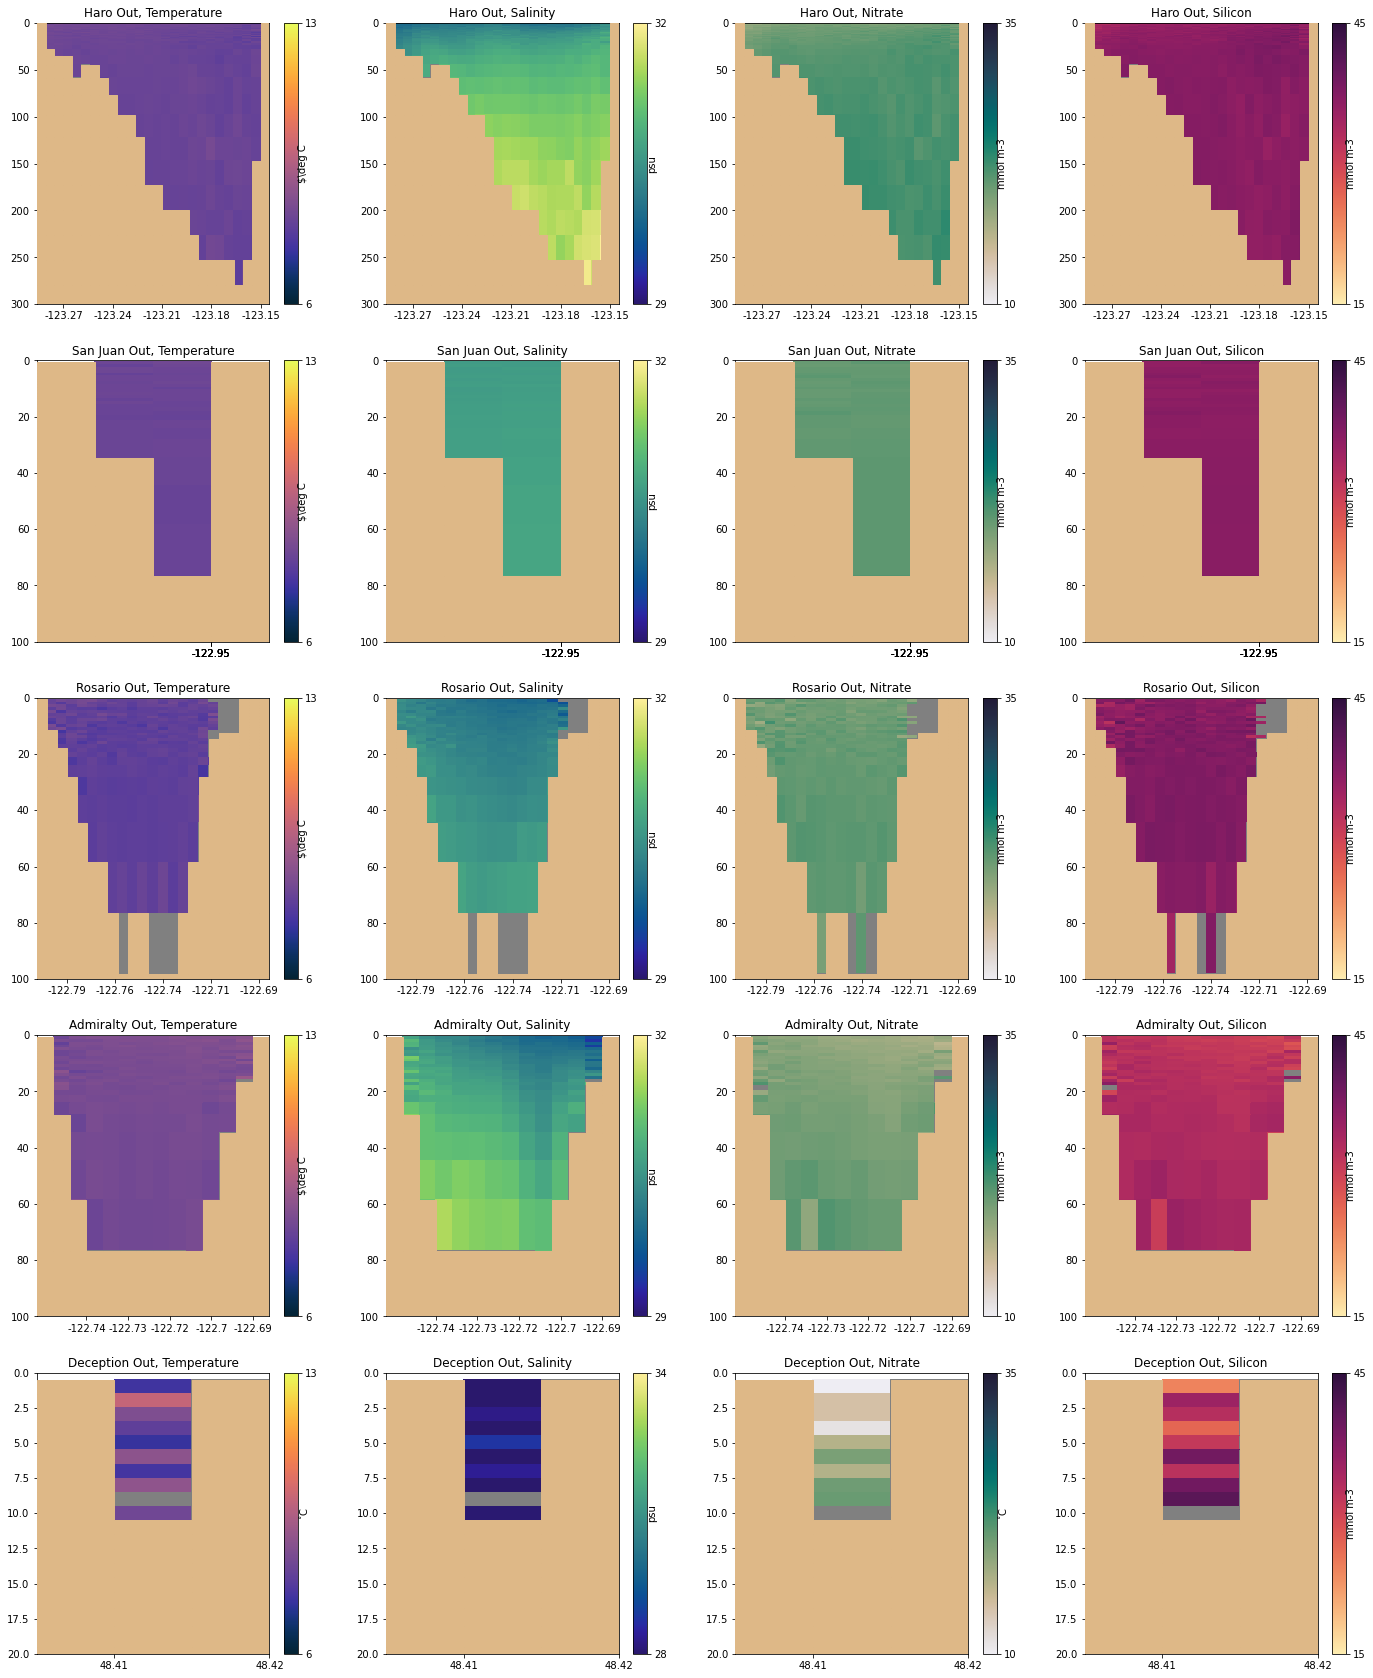

In [14]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro Out, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro Out, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro Out, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro Out, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan Out, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan Out, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan Out, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan Out, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario Out, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario Out, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario Out, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario Out, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty Out, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty Out, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty Out, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty Out, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception Out, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception Out, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception Out, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception Out, Silicon")

## Forwards run (from JDF to these straits)

In [15]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/forward_01mar19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01mar19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15mar19/SalishSea_1d_20190315_20190315_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

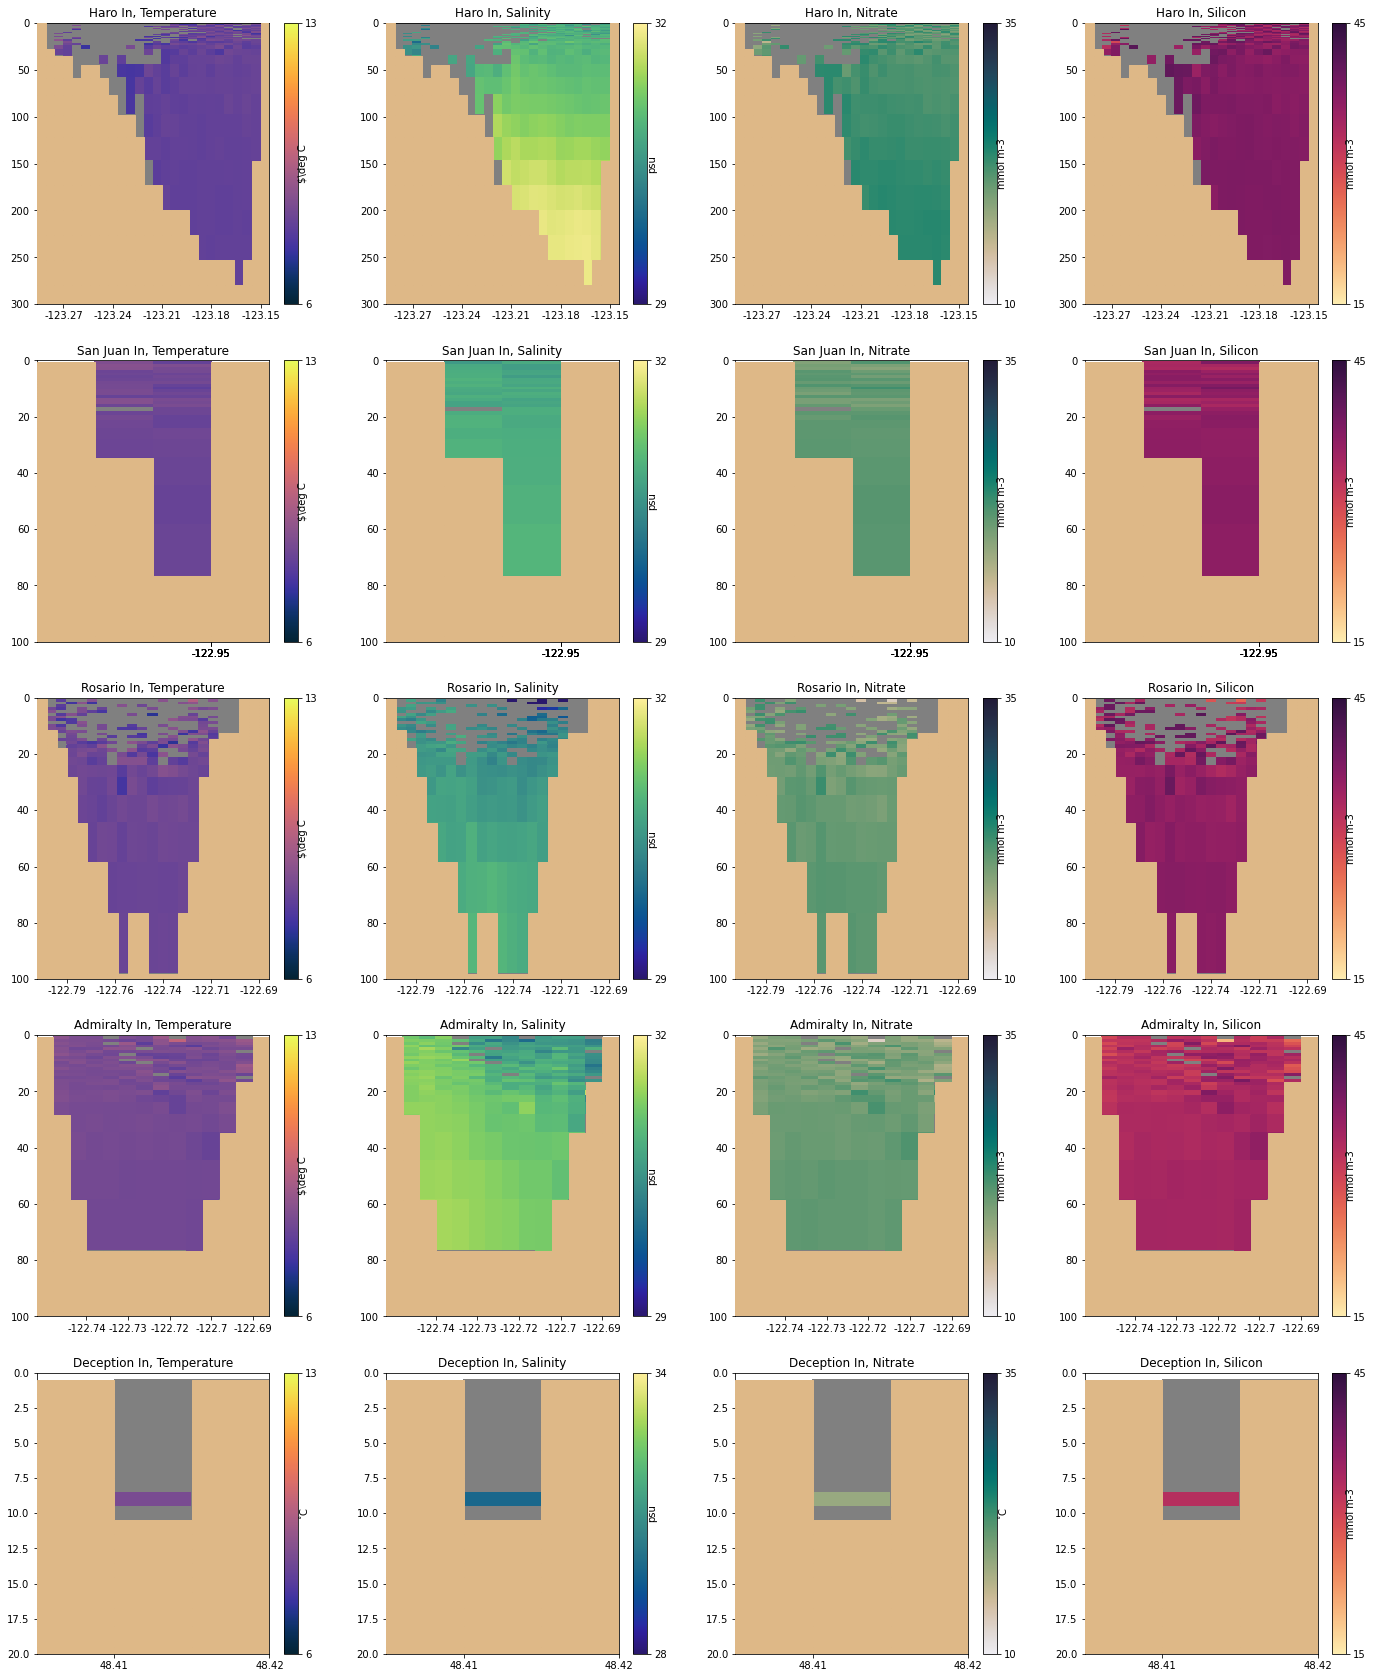

In [16]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro In, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro In, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro In, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro In, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan In, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan In, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan In, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan In, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario In, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario In, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario In, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario In, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty In, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty In, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty In, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty In, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception In, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception In, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception In, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception In, Silicon")
# nitrate = temperature
# silicon = salinity

# June
## Backwards run (source water, going from strait in title to the JDF)

In [17]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/backward_01jul19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/backward_01jul19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15jun19/SalishSea_1d_20190615_20190615_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

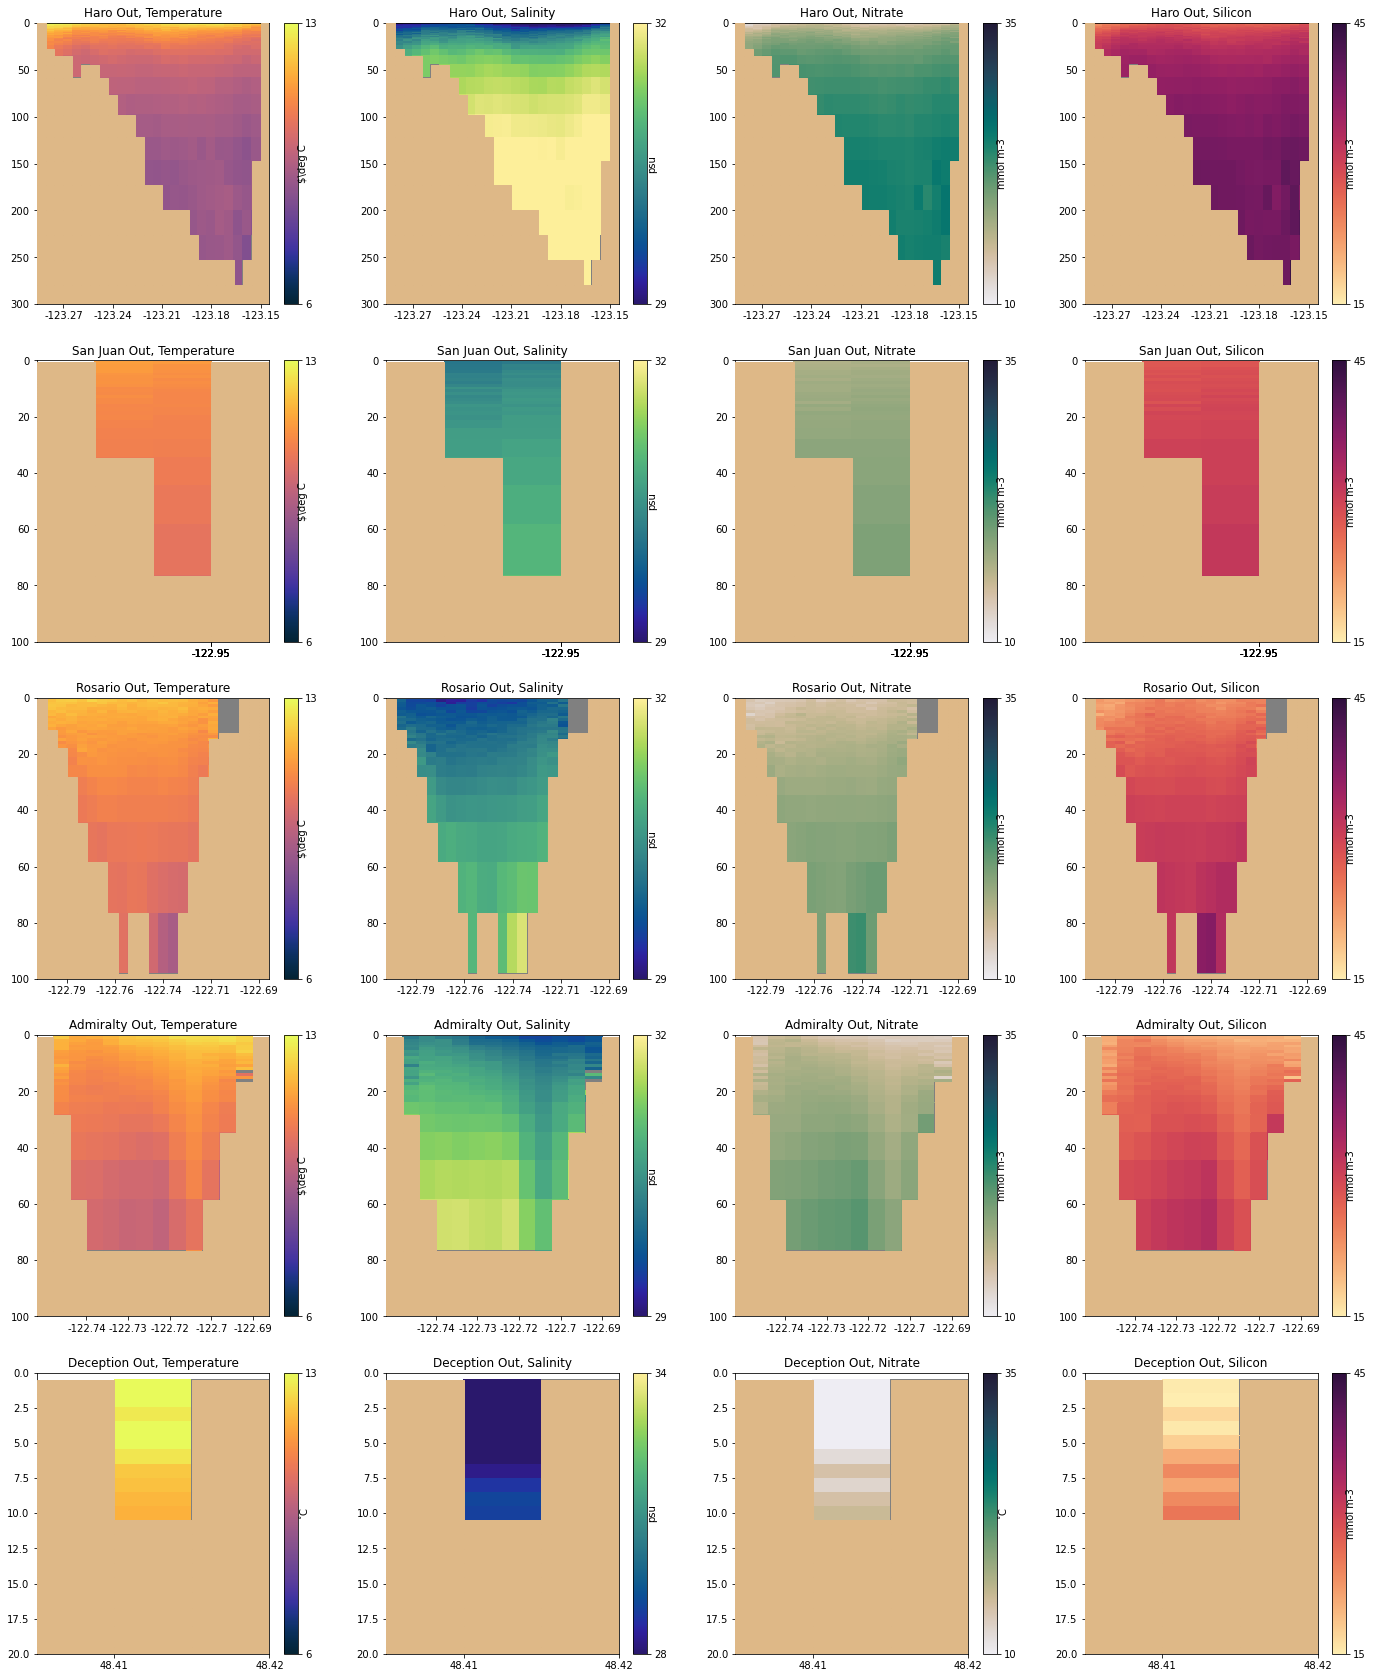

In [18]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro Out, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro Out, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro Out, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro Out, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan Out, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan Out, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan Out, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan Out, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario Out, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario Out, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario Out, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario Out, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty Out, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty Out, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty Out, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty Out, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception Out, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception Out, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception Out, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception Out, Silicon")

## Forwards run (from JDF to these straits)

In [19]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/forward_01jun19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01jun19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15jun19/SalishSea_1d_20190615_20190615_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

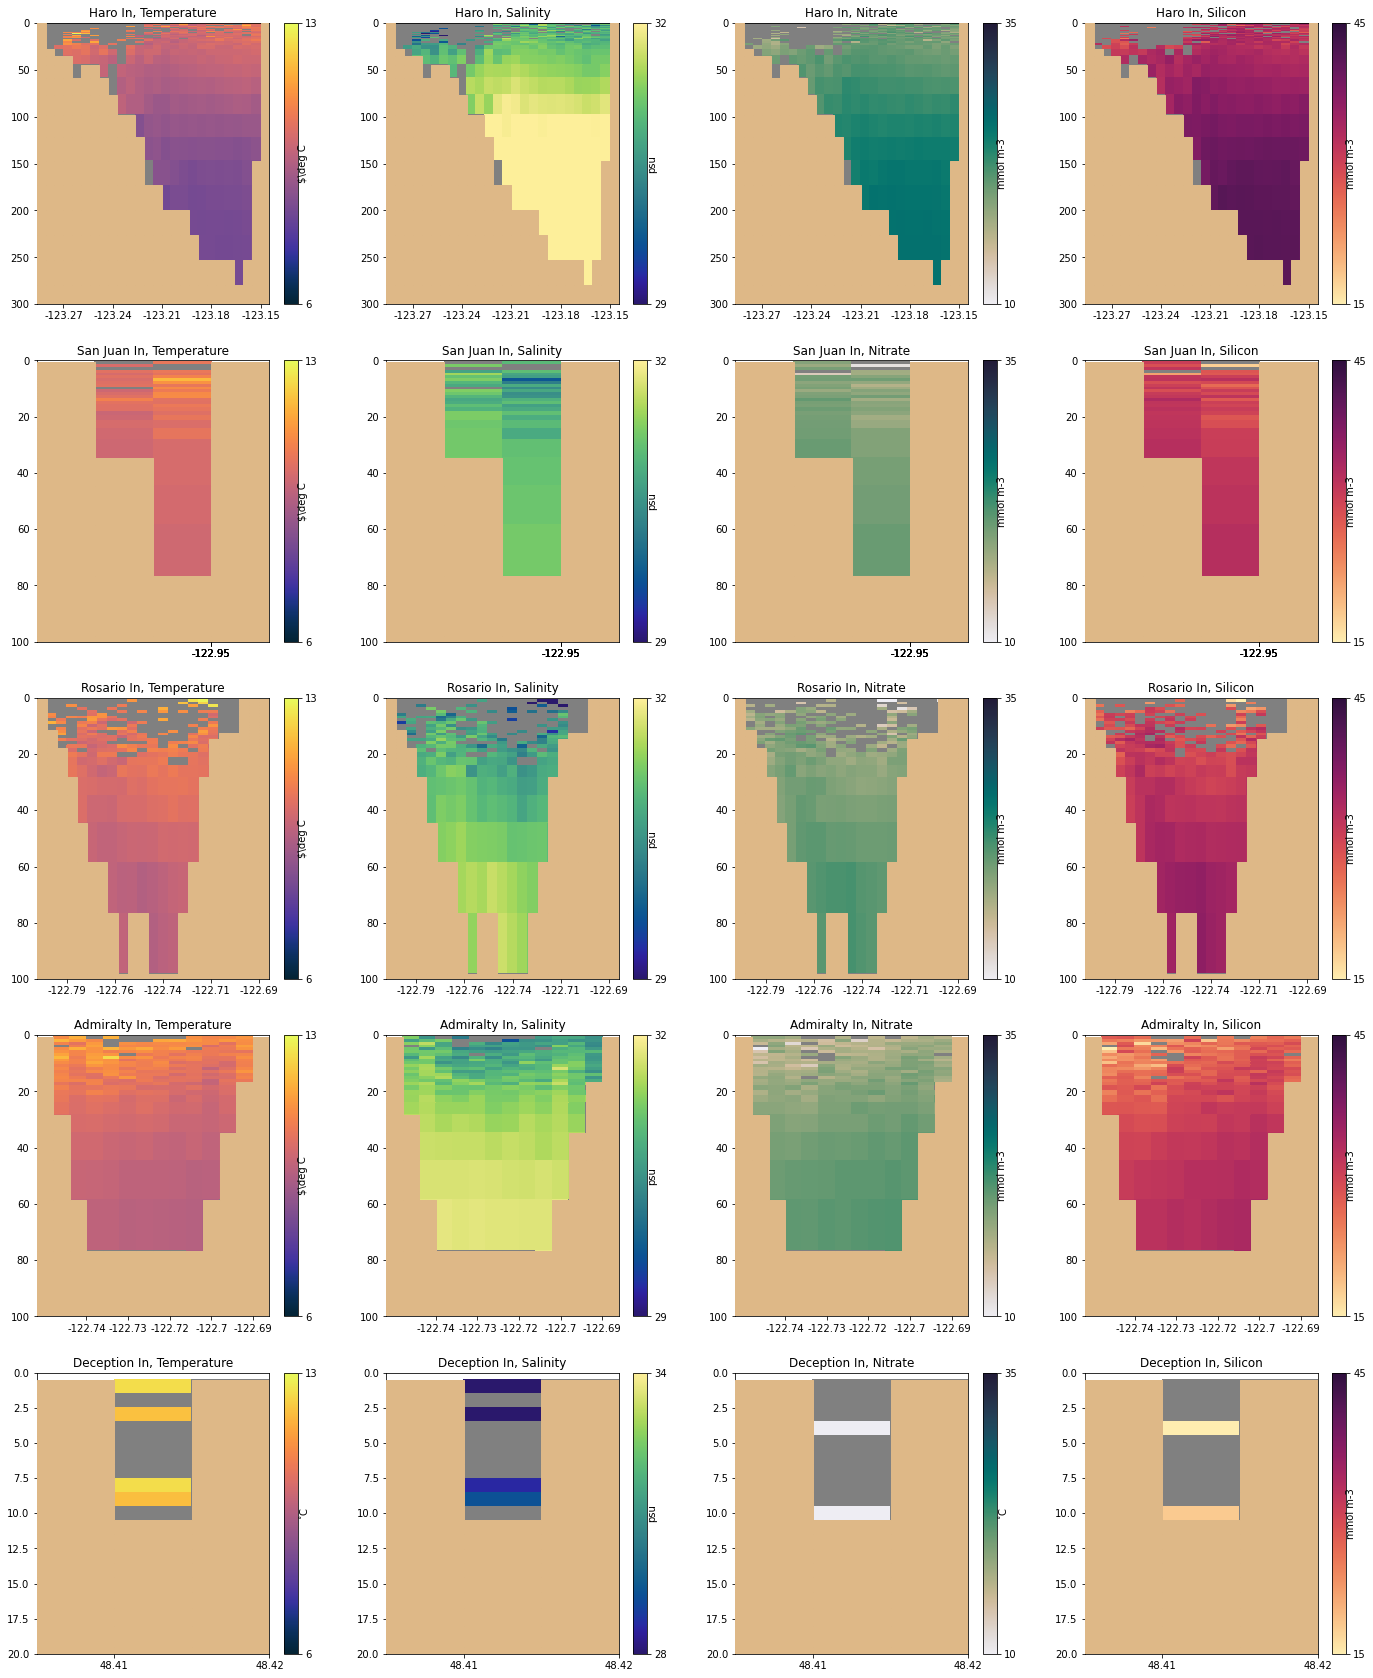

In [20]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro In, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro In, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro In, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro In, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan In, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan In, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan In, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan In, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario In, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario In, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario In, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario In, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty In, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty In, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty In, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty In, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception In, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception In, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception In, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception In, Silicon")

# September
## Backwards run (source water, going from strait in title to the JDF)

In [21]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/backward_01oct19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/backward_01oct19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15sep19/SalishSea_1d_20190915_20190915_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

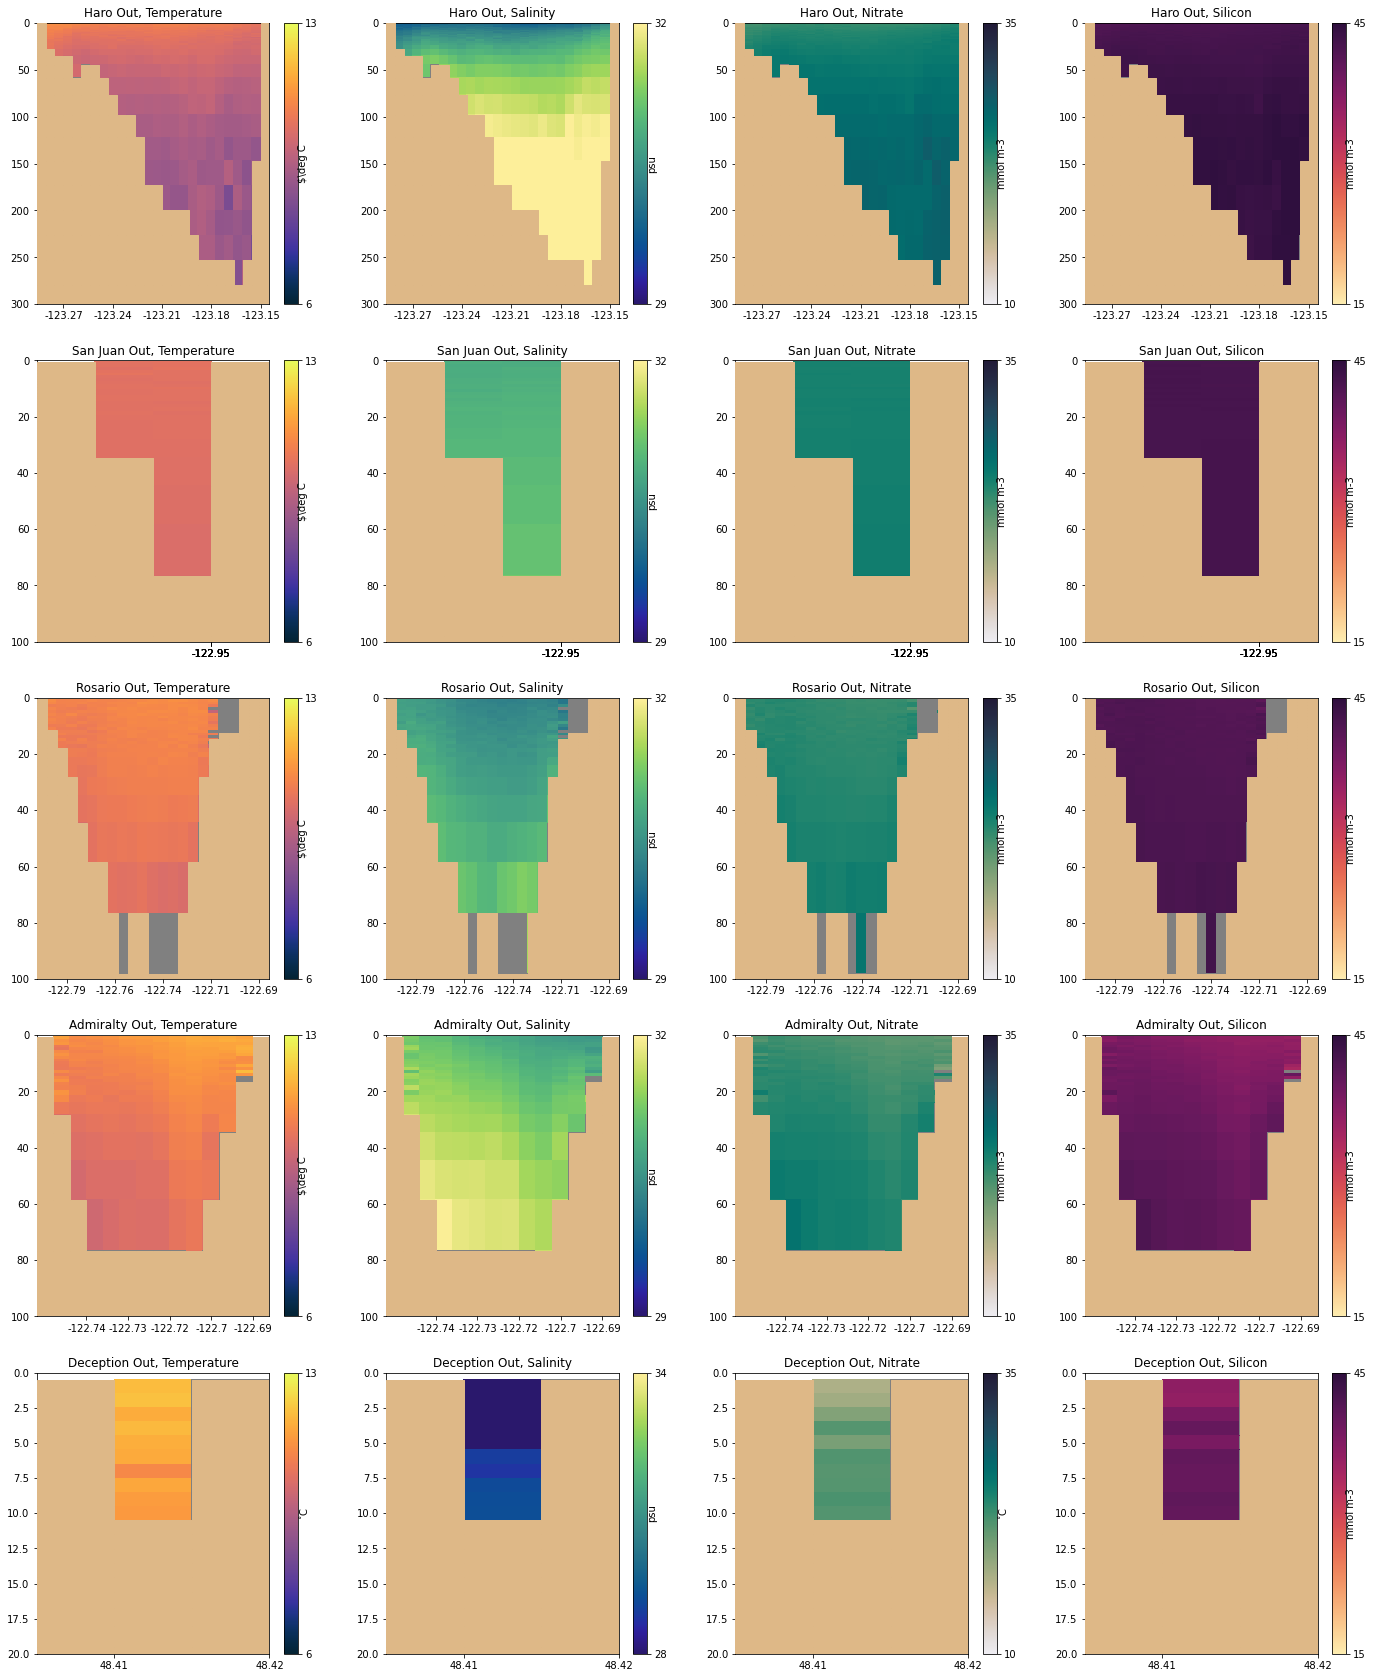

In [22]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro Out, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro Out, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro Out, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro Out, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan Out, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan Out, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan Out, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan Out, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario Out, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario Out, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario Out, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario Out, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty Out, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty Out, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty Out, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty Out, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception Out, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception Out, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception Out, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception Out, Silicon")

## Forwards run (from JDF to these straits)

In [23]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/forward_01sep19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01sep19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15sep19/SalishSea_1d_20190915_20190915_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

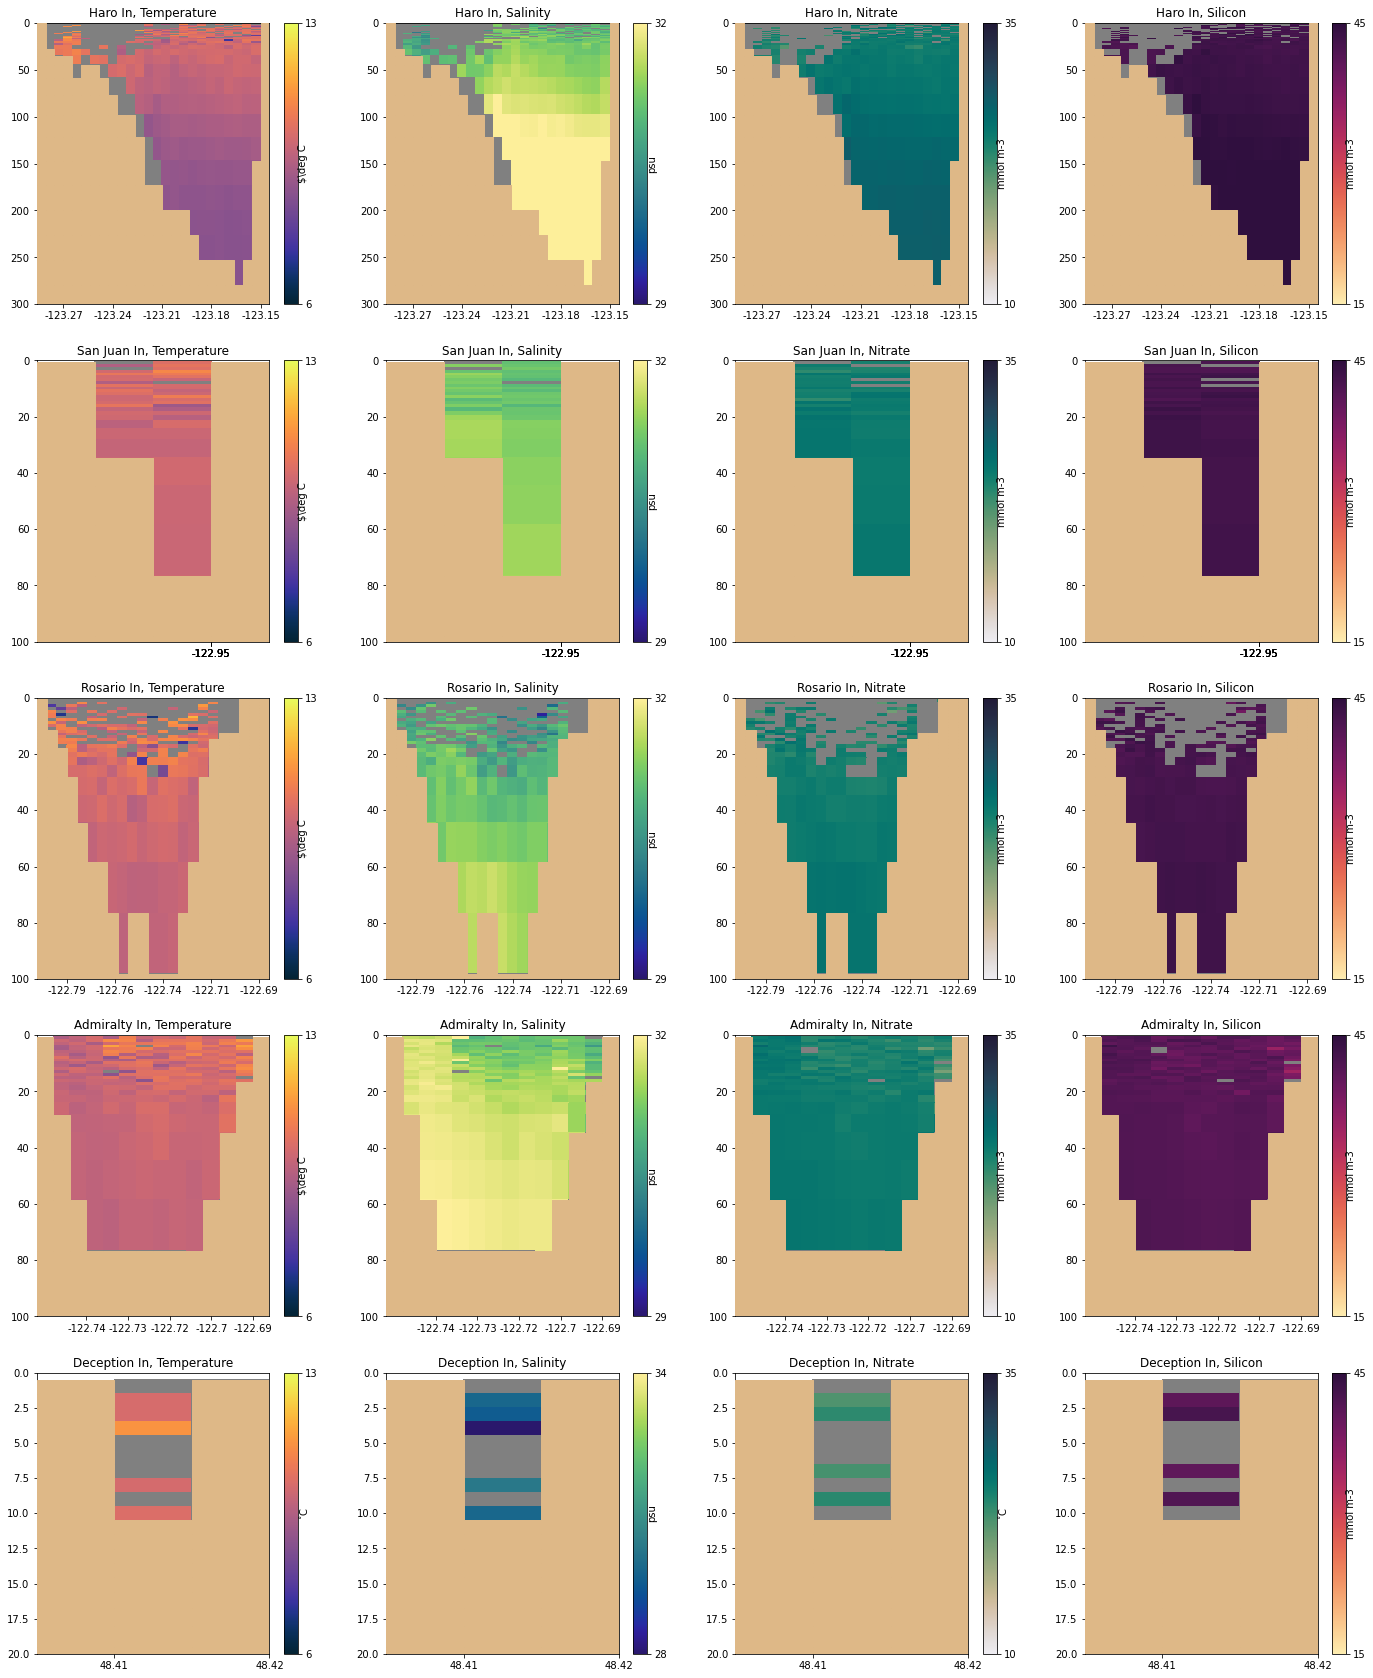

In [24]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro In, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro In, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro In, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro In, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan In, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan In, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan In, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan In, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario In, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario In, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario In, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario In, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty In, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty In, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty In, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty In, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception In, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception In, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception In, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception In, Silicon")

# December
## Backwards run (source water, going from strait in title to the JDF)

In [25]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/backward_31dec19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/backward_31dec19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15dec19/SalishSea_1d_20191215_20191215_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

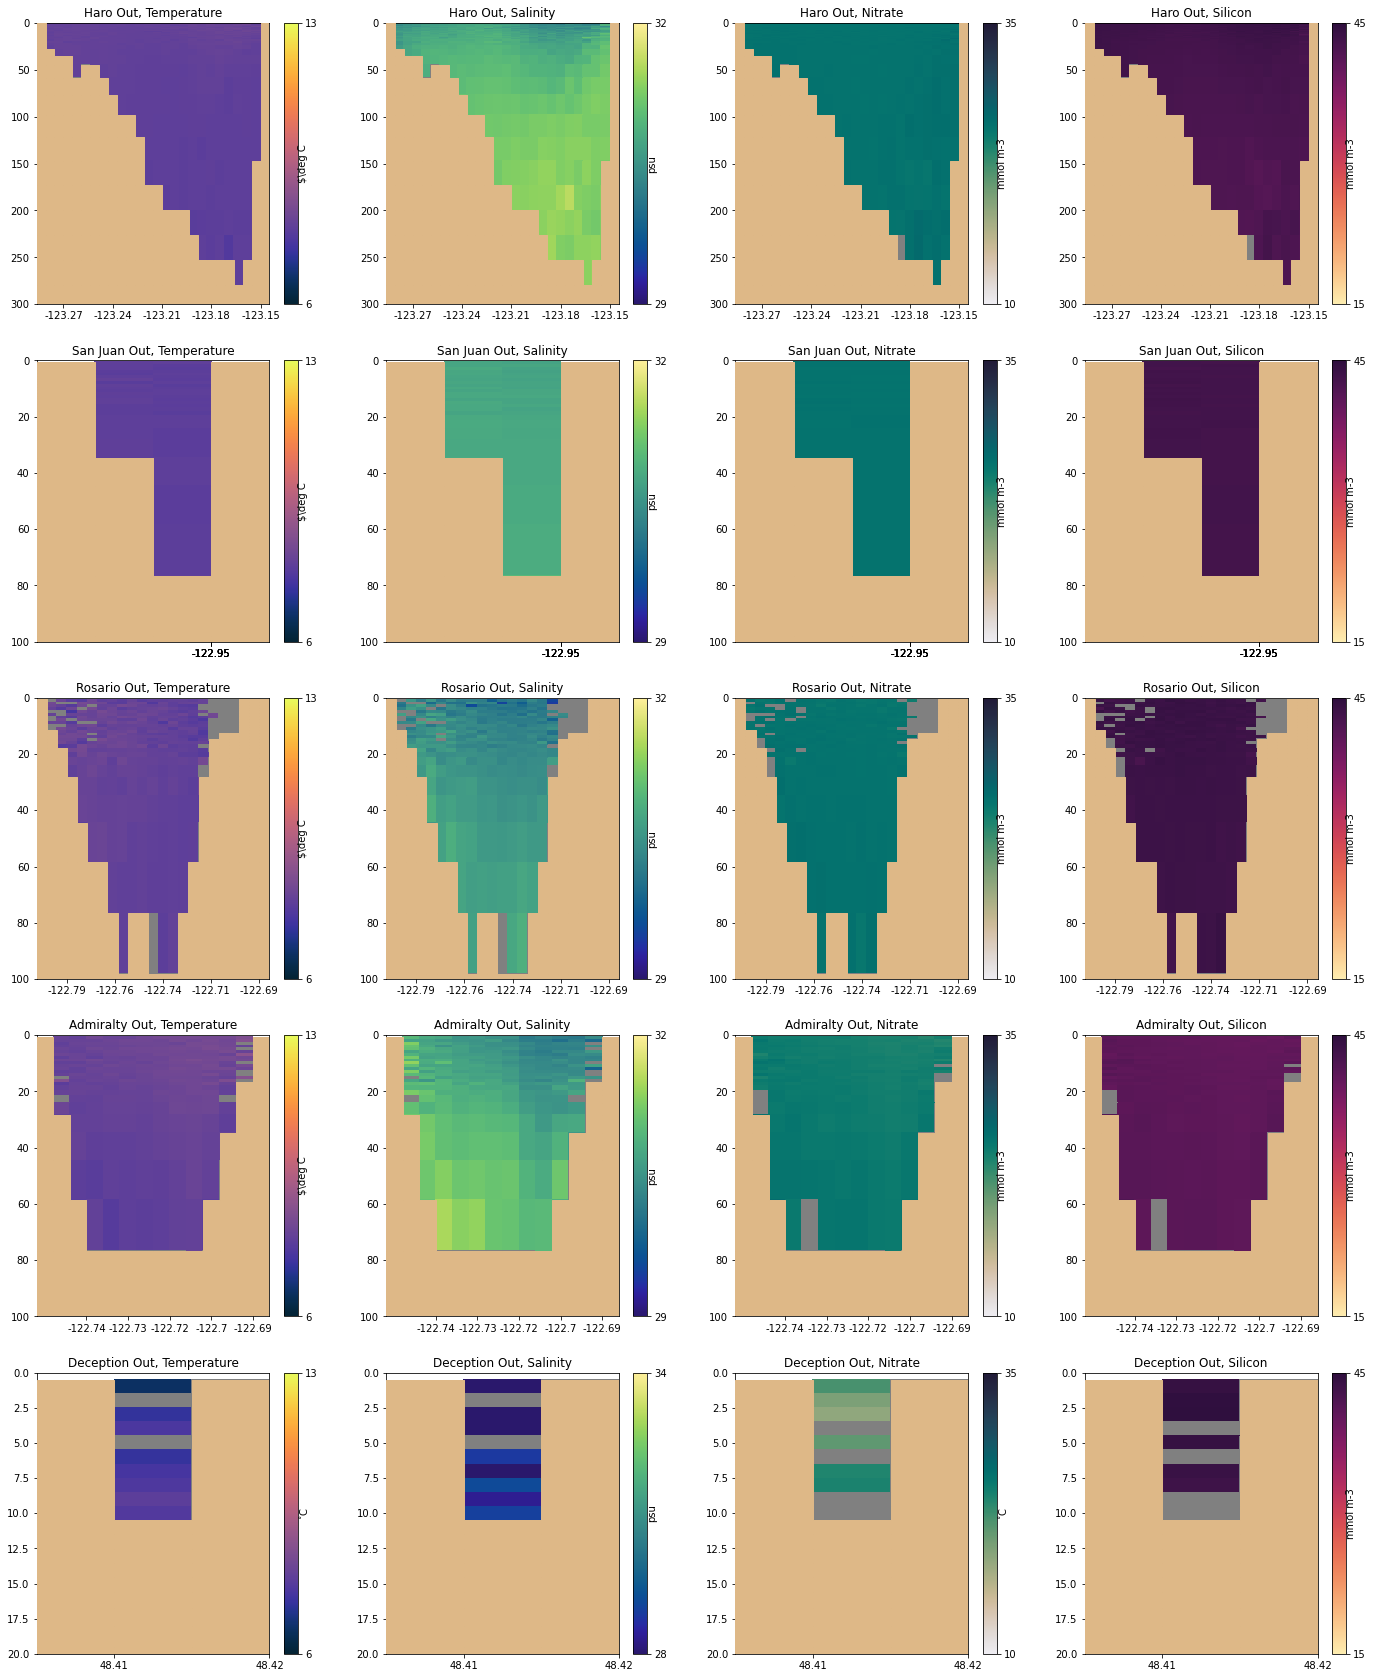

In [26]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro Out, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro Out, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro Out, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro Out, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan Out, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan Out, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan Out, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan Out, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario Out, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario Out, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario Out, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario Out, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty Out, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty Out, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty Out, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty Out, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception Out, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception Out, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception Out, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception Out, Silicon")

## Forwards run (from JDF to these straits)

In [27]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/forward_01dec19/ariane_positions_quantitative.nc'
file2 = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01dec19/ariane_positions_quantitative.nc'
salfile = '/results2/SalishSea/nowcast-green.201905/15dec19/SalishSea_1d_20191215_20191215_grid_T.nc'
mydata = xr.open_dataset(file)
mydata2 = xr.open_dataset(file2)

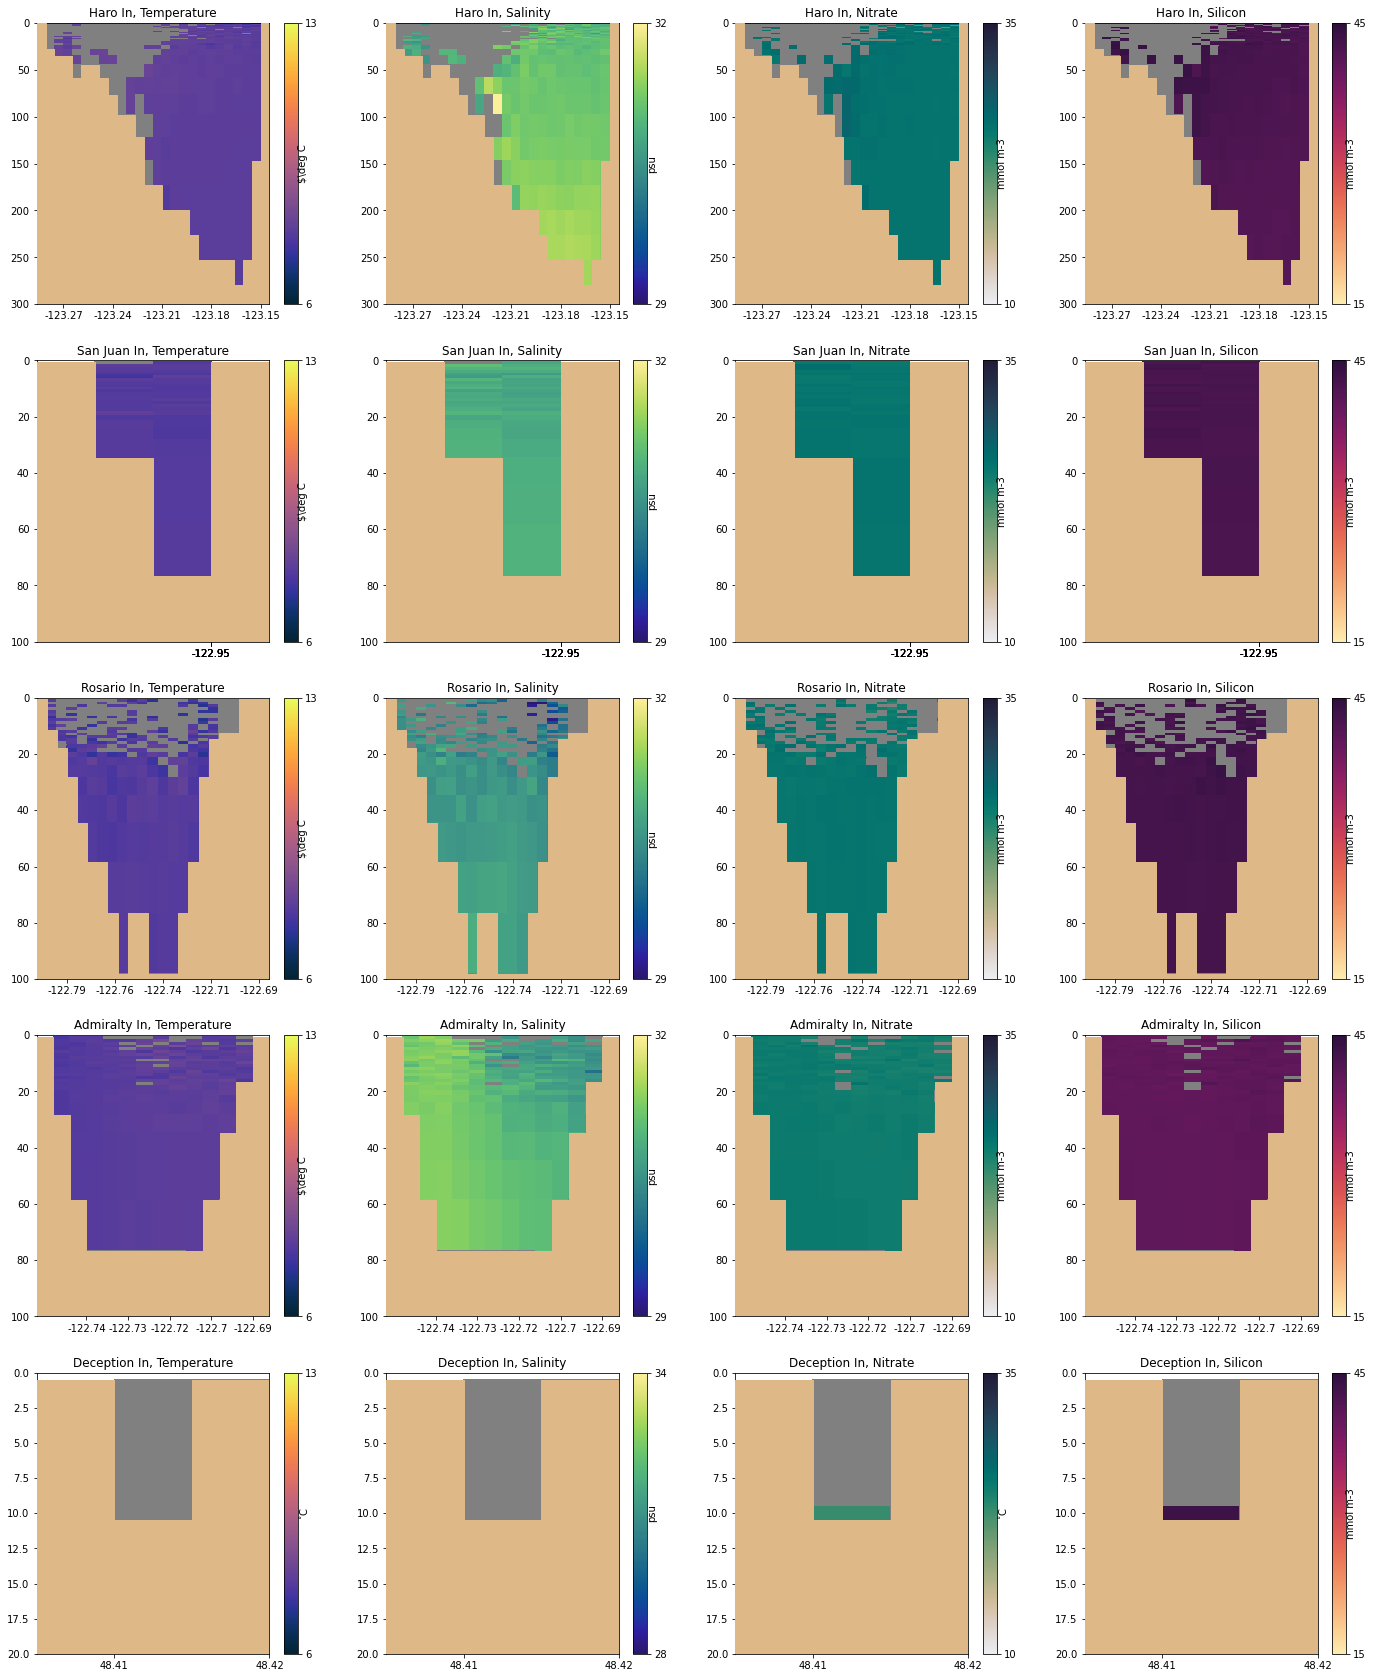

In [28]:
fig, axs = plt.subplots(5, 4, figsize = (24, 30))
tempCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,0], "Haro In, Temperature")
saltCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,1], "Haro In, Salinity")
nitrateCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,2], "Haro In, Nitrate")
siliconCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0,3], "Haro In, Silicon")

tempCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 0], "San Juan In, Temperature")
saltCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 1], "San Juan In, Salinity")
nitrateCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 2], "San Juan In, Nitrate")
siliconCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1, 3], "San Juan In, Silicon")

tempCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 0], "Rosario In, Temperature")
saltCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 1], "Rosario In, Salinity")
nitrateCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 2], "Rosario In, Nitrate")
siliconCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2, 3], "Rosario In, Silicon")

tempCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 0], "Admiralty In, Temperature")
saltCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 1], "Admiralty In, Salinity")
nitrateCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 2], "Admiralty In, Nitrate")
siliconCS(admiralty[0], admiralty[1], admiralty[2], admiralty[3], admiralty[4], axs[3, 3], "Admiralty In, Silicon")

DtempCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,0], "Deception In, Temperature")
DsaltCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,1], "Deception In, Salinity")
DnitrateCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,2], "Deception In, Nitrate")
DsiliconCS(decep[0], decep[1], decep[2], decep[3],decep[4], axs[4,3], "Deception In, Silicon")

# One year 
### Forward

In [29]:
# file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/forward1yr_01jan19/ariane_positions_quantitative.nc'
# salfile = '/results2/SalishSea/nowcast-green.201905/15dec19/SalishSea_1d_20191215_20191215_grid_T.nc'
# mydata = xr.open_dataset(file)
# time1 = mydata.init_t[0]

In [30]:
# fig, axs = plt.subplots(1, 3, figsize=(20, 6))
# tranCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0], "Haro")
# tranCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1], "San Juan")
# tranCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2], "Rosario")

### Backward

In [31]:
# file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/jordan_manydays/backward1yr_31dec19/ariane_positions_quantitative.nc'
# salfile = '/results2/SalishSea/nowcast-green.201905/15dec19/SalishSea_1d_20191215_20191215_grid_T.nc'
# mydata = xr.open_dataset(file)
# time1 = mydata.init_t[0]

In [32]:
# fig, axs = plt.subplots(1, 3, figsize=(20, 6))
# tranCS(haro[0], haro[1], haro[2], haro[3], haro[4], axs[0], "Haro")
# tranCS(sanjuan[0], sanjuan[1], sanjuan[2], sanjuan[3], sanjuan[4], axs[1], "San Juan")
# tranCS(rosario[0], rosario[1], rosario[2], rosario[3], rosario[4], axs[2], "Rosario")